In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(14, 10))
sns.set_style("whitegrid")

colors = {
    'bg': '#EFE8E8',
    'text': '#513838',
    
    'red': '#DC3545',
    'blue': "#4476C2",
    'cyan': '#0AA2C0',
    'green': '#1AA179',
    'purple': '#7121F3',
    'orange': '#FD7E14',
    'yellow': '#FFC107',
    'pink': '#D63384',
    'white_green': "#64B099"
}

custom_palette = [
    colors['blue'], colors['red'], colors['green'], 
    colors['orange'], colors['purple'], colors['cyan']
]

custom_params = {
    "figure.facecolor": colors['bg'],
    "axes.facecolor": colors['bg'],
    "savefig.facecolor": colors['bg'],
    
    "text.color": colors['text'],
    "axes.labelcolor": colors['text'],
    "xtick.color": colors['text'],
    "ytick.color": colors['text'],
    "font.family": "sans-serif",
    
    "axes.grid": True,
    "grid.color": colors['text'],
    "grid.alpha": 0.15,
    "grid.linestyle": "-",
    "grid.linewidth": 0.8,
    
    "axes.spines.left": True,
    "axes.spines.bottom": True,
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.edgecolor": colors['text'],
    "axes.linewidth": 0.8,
    
    "lines.linewidth": 1.5,
    "lines.markersize": 6,
}

sns.set_theme(
    context="talk",
    style="whitegrid",
    rc=custom_params,
    palette=custom_palette
)

df = pd.read_csv('dfc.csv')

<Figure size 1400x1000 with 0 Axes>

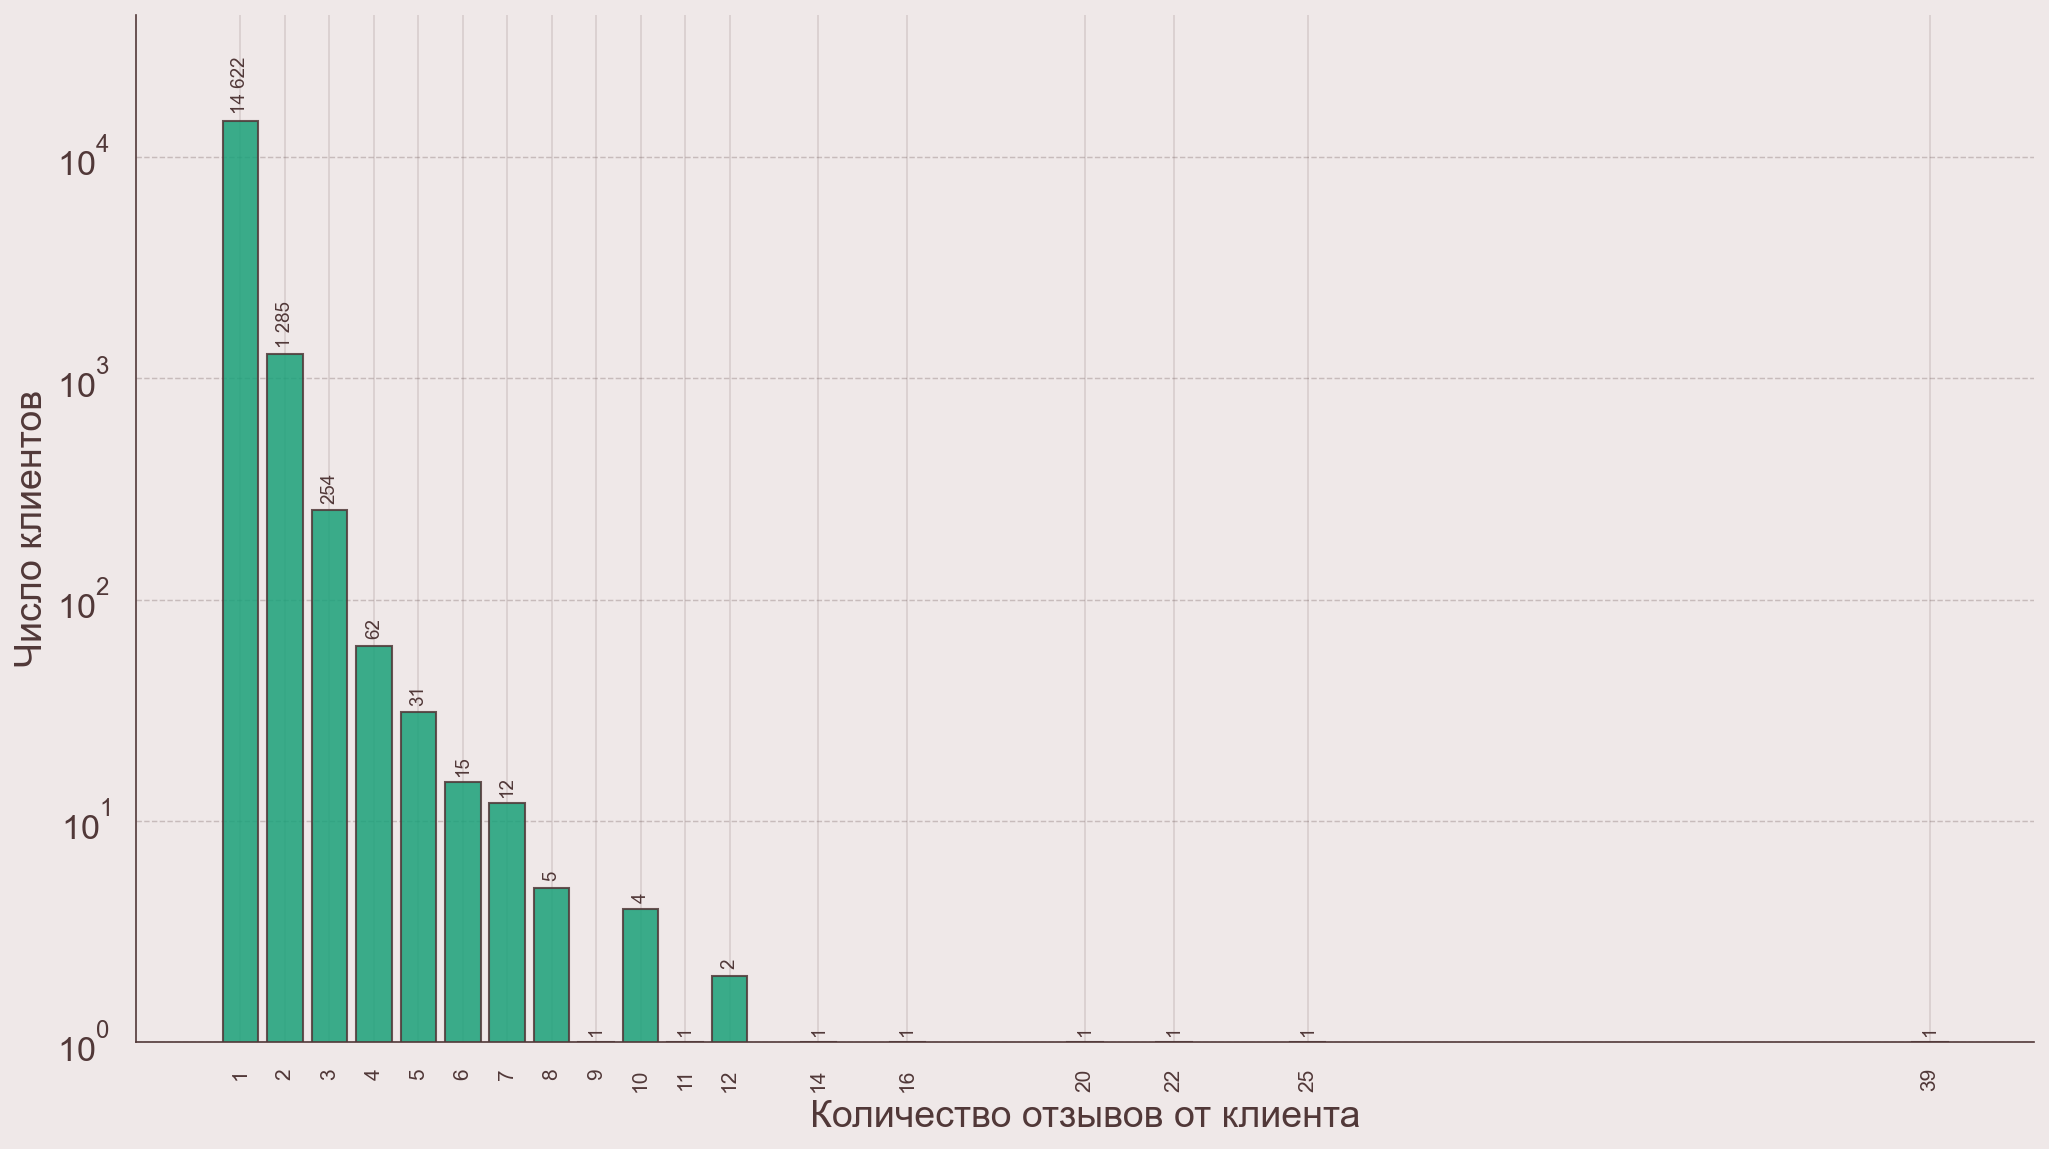

In [16]:
reviews_per_client = df.groupby('id_client').size()
dist = reviews_per_client.value_counts().sort_index()

x = dist.index.to_numpy()
y = dist.to_numpy()

fig, ax = plt.subplots(figsize=(14, 8), dpi=150)

bars = ax.bar(
    x, y,
    color=colors['green'],
    alpha=0.85,
    edgecolor=colors['text'],
    linewidth=1.0
)

ax.set_xlabel("Количество отзывов от клиента")
ax.set_ylabel("Число клиентов")

ax.set_xticks(x)
ax.set_xticklabels([str(v) for v in x], rotation=90, fontsize=10)

ax.set_yscale("log")

labels = [f"{int(v):,}".replace(",", " ") for v in y]
ax.bar_label(
    bars,
    labels=labels,
    padding=3,
    fontsize=9,
    fontweight="regular",
    color=colors["text"],
    rotation=90
)

y_max = int(y.max()) if len(y) else 1
ax.set_ylim(bottom=1, top=max(2, y_max * 3))

ax.grid(True, axis="y", alpha=0.25, linestyle="--", linewidth=0.7)
ax.set_axisbelow(True)
sns.despine(ax=ax, right=True, top=True)

plt.tight_layout()
plt.show()